## Research : Encephalopathies and Delirium  in CKG
### Pub_5.ED Group_Prediction1_cui2vec_F


#### VI. Load cui2vec on Analysis 1
    ##### 1.Convert csv to gensim readable date format
    ##### 2.Load cui2vec to Gensim
    ##### 3.Find similar concepts for a concept
    ##### 4.Get vector for a concept

#### VII.Supervised Learning ML modeling
    #### 1.Data Import
    #### 2.Get vectors as numpy array
    #### 3.* or combine the matrix with the main pandas 
    #### 4.Data Transformation
    
_Soo Kyung Bae (Scarlett : K19071757)MSc<br/>
Department of Biostatistics and Health Informatics<br/>
Institute of Psychiatry, Psychology and Neuroscience<br/>
King's College London<br/>_

_Soo Kyung Bae(Scarlett), Ph.D. Student<br/>
Dept. of Integrated Medicine(Major in Digital Healthcare)<br/>
Yonsei University College of Medicine<br/>_

In [1]:
import os
os.getcwd()

'/home/ubuntu/Scarlett/Final PG'

In [2]:
DATA_DIR = "/home/ubuntu/Scarlett/Output_F/"

### VI.  Load cui2vec on Analysis 1

##### 1. Convert csv to gensim readable date format

In [3]:
import pandas as pd

# final cui and admission matrix by admin_id for YY, YN and NN
cui_data_all_admission_F= pd.read_csv(DATA_DIR + "V_29.b.cui_data_all_admission_F.csv")

In [4]:
# NY sample 1 data for cui2vec features and all cui features
NY_cui_data_F_admission= pd.read_csv(DATA_DIR + "V_29_b_NY_cui_data_F.csv")

In [5]:
# sample1
NY_cui_data_F= pd.read_csv(DATA_DIR + "V_26.4.NY_cui_data_F.csv")

#NY_2_cui_data_F.to_csv
#-NY_2_cui_data_F= pd.read_csv(DATA_DIR + "V_26.4_2.NY_2_cui_data_F.csv")

In [6]:
cui_data_all_admission_F.head()

,Unnamed: 0,hadm_id,admittime,ED_icd,ED,Unnamed: 0.1,group,subject_id,C0000294,C0000378,...,C4547016,C4547044,C4547399,C4547876,C4547937,C4549080,C4549234,C4550347,C4551285,C4551329
0,0,190539,2186-11-21 07:15:00,1,1,3826,YY,49,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,114585,2194-10-16 12:48:00,1,1,3827,YY,115,0.0,0.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,191817,2165-05-06 18:38:00,1,1,3828,YY,133,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,197273,2188-10-06 23:56:00,1,1,3829,YY,214,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,105694,2157-05-01 05:19:00,1,1,3830,YY,223,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
NY_cui_data_F_admission.head()

,Unnamed: 0,hadm_id,admittime,ED_icd,Unnamed: 0.1,group,subject_id,C0000039,C0000167,C0000294,...,C4547044,C4547356,C4547399,C4547431,C4547937,C4551231,C4551285,C4551329,C4551390,C4551415
0,0,112213,2104-08-07 10:15:00,0,0,NY,12,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,109451,2134-09-11 12:17:00,0,1,NY,21,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,111970,2135-01-30 20:50:00,0,2,NY,21,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,188670,2183-08-21 16:48:00,0,3,NY,37,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,185910,2166-08-10 00:28:00,0,4,NY,38,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
# data 
cui_map=cui_data_all_admission_F.drop(["admittime","ED_icd"],axis=1)

In [9]:
# NY sample1
NY_map=NY_cui_data_F

In [10]:
cui_data_all_admission_F.shape

(7308, 43194)

In [11]:
print(cui_map.shape)
print(NY_map.shape)


(7308, 43192)
(7155, 45706)


##### 2. Load cui2vec to Gensim

In [25]:
import pandas as pd
import numpy as np

In [26]:
DATA_DIR2 = "/home/ubuntu/Tao/KER/data/"

In [27]:
#with open('/home/ubuntu/Tao/KER/data/cui2vec_pretrained.csv') as fd: 
with open(DATA_DIR2 + "cui2vec_pretrained.csv") as fd:
      cui2vec_df = pd.read_csv(fd, index_col=0)

In [28]:
#np.savetxt('/home/ubuntu/Tao/KER/data/cui2vec_pretrained.txt', cui2vec_df.reset_index().values, delimiter=" ", header="{} {}".format(len(cui2vec_df), len(cui2vec_df.columns)), comments="", fmt=["%s"] + ["%.18e"]*len(cui2vec_df.columns))
np.savetxt(DATA_DIR2 + "cui2vec_pretrained.txt", cui2vec_df.reset_index().values, delimiter=" ", header="{} {}".format(len(cui2vec_df), len(cui2vec_df.columns)), comments="", fmt=["%s"] + ["%.18e"]*len(cui2vec_df.columns))

In [29]:
from gensim.models.keyedvectors import KeyedVectors

In [30]:
#wvs = KeyedVectors.load_word2vec_format('/home/ubuntu/Tao/KER/data/cui2vec_pretrained.txt', binary=False)
wvs = KeyedVectors.load_word2vec_format(DATA_DIR2 + "cui2vec_pretrained.txt", binary=False)

In [32]:
#cui2vec_df.reset_index().values
cui2vec_df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V491,V492,V493,V494,V495,V496,V497,V498,V499,V500
C0000052,-0.004071,0.002169,-4.466913e-17,-0.006110,-0.001187,0.000047,0.007681,-0.002564,0.012169,8.510987e-17,...,-0.000316,-0.049984,-0.022582,-0.041039,0.003112,0.025915,-0.065661,0.004741,-0.004502,-0.029053
C0000163,-0.008389,0.002486,-3.816392e-17,-0.004083,-0.002875,0.001207,0.005683,0.002054,0.007849,4.466913e-17,...,0.053730,0.048069,-0.058616,-0.013041,-0.005875,-0.000951,-0.007084,0.057521,-0.008791,0.001159
C0000167,-0.008328,0.002697,-5.811324e-17,-0.014372,0.004227,0.008176,0.007521,-0.000114,0.012576,5.160802e-17,...,0.031376,0.026515,-0.064476,0.040333,-0.005710,-0.027542,0.003274,0.062406,0.020109,-0.014616
C0000172,-0.008589,0.002666,-1.734723e-17,-0.001215,-0.001841,-0.001273,0.002268,-0.000551,0.003284,-1.734723e-17,...,0.007605,0.009991,-0.035895,-0.014936,0.003336,0.001816,-0.007257,0.014691,0.001276,0.001881
C0000215,-0.001324,-0.000040,-1.561251e-17,-0.002030,-0.000095,0.000728,0.003543,-0.001463,0.003100,4.856887e-17,...,-0.012399,-0.002617,-0.020168,0.027851,0.002107,-0.013557,0.019516,-0.000823,0.025063,-0.002061


##### 3. Find similar concepts for a concept

In [203]:
#cui2vec_df.reset_index().values
print(len(cui2vec_df), len(cui2vec_df.columns))

109053 500


In [204]:
wvs

In [20]:
wvs.most_similar('C0034079')

[('C0084785', 0.8936415910720825),
 ('C0216760', 0.8877546787261963),
 ('C1335060', 0.8793514966964722),
 ('C1336119', 0.8732134103775024),
 ('C0278983', 0.8720805644989014),
 ('C1336139', 0.8703348636627197),
 ('C0278504', 0.8608325719833374),
 ('C1710016', 0.8495419025421143),
 ('C1266002', 0.8291577696800232),
 ('C0242379', 0.8269763588905334)]

In [21]:
#C1319200, C4547399
#wvs.most_similar('C1319200')
#wvs.most_similar('C4547399')

[('C3650806', 0.7699432969093323),
 ('C0420205', 0.7536798715591431),
 ('C1320388', 0.7500320672988892),
 ('C1305863', 0.7462657690048218),
 ('C0581116', 0.7421611547470093),
 ('C0521108', 0.7359882593154907),
 ('C0234386', 0.7318733930587769),
 ('C0150255', 0.7313929796218872),
 ('C0520918', 0.7284095287322998),
 ('C0205253', 0.7229247093200684)]

##### 4.Get vector for a concept

In [22]:
#C0233777
len(wvs['C0233777'])

500

In [23]:
print(cui2vec_df.columns[0])
cui2vec_df.index

V1


Index(['C0000052', 'C0000163', 'C0000167', 'C0000172', 'C0000215', 'C0000257',
       'C0000266', 'C0000294', 'C0000300', 'C0000343',
       ...
       'C0445087', 'C0427703', 'C1720266', 'C0221218', 'C0323628', 'C0439491',
       'C1233027', 'C0393676', 'C0022275', 'C1285508'],
      dtype='object', length=109053)

In [24]:
len(cui2vec_df.columns)

500

In [211]:
########Name Search Begin

In [212]:
from py2neo import Node, Relationship, Graph
# from igraph import Graph as iGraph

In [213]:
graph = Graph("http://10.200.112.233:7474/db/data/", user="scarlett", password="Admin123")

In [214]:
def cui2name(cui):
    query = """
        MATCH (p:Concepts{id:'""" + cui + """' })
        RETURN p.name"""
    return (graph.run(query).to_series()).tolist()

In [219]:
cui_df=cui2vec_df.index.values.tolist()

In [222]:
cui_df = pd.DataFrame (cui_df )

In [227]:
cui_df.columns= ['cui']

In [229]:
#cui_df

In [ ]:
#cui2vec_df['name']=cui2vec_df.index.apply(lambda x: cui2name(x))
#cui_df['name']=cui_df['cui'].apply(lambda x: cui2name(x))


In [45]:
cui_df.head()

'C0000052'

In [ ]:
#cui_df.to_csv(DATA_DIR + "cui2vec_cui_name.csv", index=True)

In [ ]:
#######name search End

In [32]:
#np.zeros(500)

In [19]:
print(cui_map.columns[5 :cui_map.shape[1]-1])

Index(['subject_id', 'C0000294', 'C0000378', 'C0000473', 'C0000477',
       'C0000481', 'C0000503', 'C0000608', 'C0000618', 'C0000726',
       ...
       'C4547015', 'C4547016', 'C4547044', 'C4547399', 'C4547876', 'C4547937',
       'C4549080', 'C4549234', 'C4550347', 'C4551285'],
      dtype='object', length=43186)


In [20]:
cui_map=cui_map.drop(["Unnamed: 0","Unnamed: 0.1"],axis=1)

In [21]:
cui_map.columns

Index(['hadm_id', 'ED', 'group', 'subject_id', 'C0000294', 'C0000378',
       'C0000473', 'C0000477', 'C0000481', 'C0000503',
       ...
       'C4547016', 'C4547044', 'C4547399', 'C4547876', 'C4547937', 'C4549080',
       'C4549234', 'C4550347', 'C4551285', 'C4551329'],
      dtype='object', length=43190)

In [22]:
NY_map=NY_map.drop(["Unnamed: 0"],axis=1)


In [23]:
NY_map.head()

,group,subject_id,hadm_id,C0000039,C0000167,C0000294,C0000378,C0000477,C0000503,C0000608,...,C4547044,C4547356,C4547399,C4547431,C4547937,C4551231,C4551285,C4551329,C4551390,C4551415
0,NY,12,112213,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,NY,21,109451,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,NY,21,111970,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,NY,37,188670,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,NY,38,185910,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [41]:
#cui_map

In [46]:
#cui_l=cui_map.columns[4 :cui_map.shape[1]-1]
#print(cui_map.columns[cui_map.shape[1]-1])
#cui_l[cui_map.shape[1]-6]
#cui_map.loc[0,cui_l[cui_map.shape[1]-6]]
#print(cui_map.iloc[cui_map.shape[0]-1,1])
#print(cui_map.shape)
#cui_l=cui_map.columns[6 :cui_map.shape[1]]
#print(cui_l)

In [24]:
NY_map.columns

Index(['group', 'subject_id', 'hadm_id', 'C0000039', 'C0000167', 'C0000294',
       'C0000378', 'C0000477', 'C0000503', 'C0000608',
       ...
       'C4547044', 'C4547356', 'C4547399', 'C4547431', 'C4547937', 'C4551231',
       'C4551285', 'C4551329', 'C4551390', 'C4551415'],
      dtype='object', length=45705)

In [193]:
#### Calculate mean CUI2Vec for cui_map : data for model building

In [25]:
def avg_cui_2vec(x):
    matrix = []
    count = 0 
    for cui, c in x:
        if cui in wvs:
            matrix.append(wvs[cui]*c)
        else:
            matrix.append(np.zeros(500))
        count += c
    return np.sum(matrix, axis=0)/count

In [26]:
id_vars = ['hadm_id', 'ED', 'group', 'subject_id']
value_vars = list(set(list(cui_map)) - set(id_vars))

size = 1000
i = 0
print(len(cui_map))
df_vecs = []
while i*size <= len(cui_map):
    print(i)
    sdf = pd.melt(cui_map.iloc[i*size:min((i+1)*size,len(cui_map))], id_vars=id_vars, value_vars=value_vars)
    sdf = sdf[sdf['value']!= 0]
    sdf = sdf.groupby(['hadm_id', 'ED', 'group', 'subject_id'])[['variable', 'value']].apply(lambda g: list(map(tuple, g.values.tolist()))).reset_index()
    sdf['vec'] = sdf[0].apply(lambda x: avg_cui_2vec(x))
    df_vecs.append(sdf)
    i += 1
df_vecs = pd.concat(df_vecs)

7308
0
1
2
3
4
5
6
7


In [27]:
df_vecs.shape

(7308, 6)

In [28]:
cui_map.shape

(7308, 43190)

In [29]:
df_vecs.head()

,hadm_id,ED,group,subject_id,0,vec
0,100017,1,YY,16229,"[(C0004916, 1.0), (C0220938, 1.0), (C0439234, ...","[-0.07690681546951192, 0.033919950955279284, -..."
1,100045,1,YY,1569,"[(C0565967, 1.0), (C1708065, 1.0), (C0228174, ...","[-0.19185268613410614, 0.04241372964607038, -9..."
2,100053,1,YY,24912,"[(C0205406, 1.0), (C0004916, 1.0), (C1522577, ...","[-0.33801508071251457, 0.05990129452247637, -4..."
3,100131,1,YY,10150,"[(C0275586, 1.0), (C0020443, 1.0), (C0332294, ...","[-0.22506989018403073, 0.078879789682721, -2.5..."
4,100249,1,YY,20828,"[(C0001554, 1.0), (C1522577, 4.0), (C0205549, ...","[-0.2471305358242873, 0.09274301442209257, -1...."


In [30]:
df_vecs.to_csv(DATA_DIR + "V_30.c2vec_all_matrix_df_vecs.csv", index=True)

In [31]:
#### Calculate mean CUI2Vec for NY_map

In [32]:
#def avg_cui_2vec(x):
#    matrix = []
#    count = 0 
#    for cui, c in x:
#       if cui in wvs:
#            matrix.append(wvs[cui]*c)
#        else:
#            matrix.append(np.zeros(500))
#        count += c
#    return np.sum(matrix, axis=0)/count

In [33]:
id_vars = ['hadm_id', 'group', 'subject_id']
value_vars = list(set(list(NY_map)) - set(id_vars))

size = 1000
i = 0
print(len(NY_map))
df_vecs2 = []
while i*size <= len(NY_map):
    print(i)
    sdf = pd.melt(NY_map.iloc[i*size:min((i+1)*size,len(NY_map))], id_vars=id_vars, value_vars=value_vars)
    sdf = sdf[sdf['value']!= 0]
    sdf = sdf.groupby(['hadm_id', 'group', 'subject_id'])[['variable', 'value']].apply(lambda g: list(map(tuple, g.values.tolist()))).reset_index()
    sdf['vec'] = sdf[0].apply(lambda x: avg_cui_2vec(x))
    df_vecs2.append(sdf)
    i += 1
df_vecs2 = pd.concat(df_vecs2)

7155
0
1
2
3
4
5
6
7


In [34]:
NY_map.shape

(7155, 45705)

In [35]:
df_vecs2.head()

,hadm_id,group,subject_id,0,vec
0,100135,NY,2507,"[(C0513836, 7.0), (C0001554, 1.0), (C0679823, ...","[-0.060211540787337675, 0.028426171706167323, ..."
1,100335,NY,2700,"[(C0205406, 3.0), (C0728982, 1.0), (C0004916, ...","[-0.2964939089011547, 0.11777656748394441, -4...."
2,100498,NY,3589,"[(C0205406, 14.0), (C0513836, 1.0), (C0679823,...","[-0.08747506541971674, 0.04756986854966648, -1..."
3,100514,NY,5213,"[(C0230185, 1.0), (C1522577, 2.0), (C1442449, ...","[-0.13597063654922423, 0.03831164157854506, -4..."
4,100617,NY,5324,"[(C0004916, 4.0), (C1522577, 5.0), (C1442449, ...","[-0.16079917626908435, 0.014682825692788734, 4..."


In [36]:
df_vecs2.to_csv(DATA_DIR + "V_30.2.c2vec_NY_matrix_df2_vecs.csv", index=True)

In [60]:
df_vecs.columns

Index(['hadm_id', 'ED', 'group', 'subject_id', 0, 'vec'], dtype='object')

### VII.Supervised Learning ML modeling

#### 1. Data Import

In [1]:
###########################################
###########Train data and Test Data and 5 CV

In [37]:
import pandas as pd
# 1. train data
# final cui and admission matrix by admin_id for YY, YN
data_cui2vec = pd.read_csv(DATA_DIR + "V_30.c2vec_all_matrix_df_vecs.csv")

# NY group data for predict.prob
NY_cui2vec = pd.read_csv(DATA_DIR + "V_30.2.c2vec_NY_matrix_df2_vecs.csv")

In [38]:
data_cui2vec.ED.value_counts()

1    3663
0    3645
Name: ED, dtype: int64

In [39]:
# 1.2. Split data into train and test(8:2)

In [40]:
data_cui2vec.head()

,Unnamed: 0,hadm_id,ED,group,subject_id,0,vec
0,0,100017,1,YY,16229,"[('C0004916', 1.0), ('C0220938', 1.0), ('C0439...",[-7.69068155e-02 3.39199510e-02 -1.28393140e-...
1,1,100045,1,YY,1569,"[('C0565967', 1.0), ('C1708065', 1.0), ('C0228...",[-1.91852686e-01 4.24137296e-02 -9.15116853e-...
2,2,100053,1,YY,24912,"[('C0205406', 1.0), ('C0004916', 1.0), ('C1522...",[-3.38015081e-01 5.99012945e-02 -4.08479112e-...
3,3,100131,1,YY,10150,"[('C0275586', 1.0), ('C0020443', 1.0), ('C0332...",[-2.25069890e-01 7.88797897e-02 -2.57063391e-...
4,4,100249,1,YY,20828,"[('C0001554', 1.0), ('C1522577', 4.0), ('C0205...",[-2.47130536e-01 9.27430144e-02 -1.28655044e-...


In [41]:
data_cui2vec.columns = ['Unnamed: 0', 'hadm_id', 'ED', 'group', 'subject_id', 'cuis', 'vec']

In [42]:
data=data_cui2vec
data.columns

Index(['Unnamed: 0', 'hadm_id', 'ED', 'group', 'subject_id', 'cuis', 'vec'], dtype='object')

In [43]:
data.head()

,Unnamed: 0,hadm_id,ED,group,subject_id,cuis,vec
0,0,100017,1,YY,16229,"[('C0004916', 1.0), ('C0220938', 1.0), ('C0439...",[-7.69068155e-02 3.39199510e-02 -1.28393140e-...
1,1,100045,1,YY,1569,"[('C0565967', 1.0), ('C1708065', 1.0), ('C0228...",[-1.91852686e-01 4.24137296e-02 -9.15116853e-...
2,2,100053,1,YY,24912,"[('C0205406', 1.0), ('C0004916', 1.0), ('C1522...",[-3.38015081e-01 5.99012945e-02 -4.08479112e-...
3,3,100131,1,YY,10150,"[('C0275586', 1.0), ('C0020443', 1.0), ('C0332...",[-2.25069890e-01 7.88797897e-02 -2.57063391e-...
4,4,100249,1,YY,20828,"[('C0001554', 1.0), ('C1522577', 4.0), ('C0205...",[-2.47130536e-01 9.27430144e-02 -1.28655044e-...


In [44]:
NY_cui2vec.head()

,Unnamed: 0,hadm_id,group,subject_id,0,vec
0,0,100135,NY,2507,"[('C0513836', 7.0), ('C0001554', 1.0), ('C0679...",[-6.02115408e-02 2.84261717e-02 -1.11255549e-...
1,1,100335,NY,2700,"[('C0205406', 3.0), ('C0728982', 1.0), ('C0004...",[-2.96493909e-01 1.17776567e-01 -4.05382299e-...
2,2,100498,NY,3589,"[('C0205406', 14.0), ('C0513836', 1.0), ('C067...",[-8.74750654e-02 4.75698685e-02 -1.48907379e-...
3,3,100514,NY,5213,"[('C0230185', 1.0), ('C1522577', 2.0), ('C1442...",[-1.35970637e-01 3.83116416e-02 -4.78648623e-...
4,4,100617,NY,5324,"[('C0004916', 4.0), ('C1522577', 5.0), ('C1442...",[-1.60799176e-01 1.46828257e-02 4.79830950e-...


In [45]:
NY_cui2vec.columns = ['Unnamed: 0', 'hadm_id', 'group', 'subject_id', 'cuis', 'vec']

In [46]:
data_NY=NY_cui2vec
data_NY.columns

Index(['Unnamed: 0', 'hadm_id', 'group', 'subject_id', 'cuis', 'vec'], dtype='object')

#### 2. get vectors as numpy array

In [47]:
# 1. For train and test data

In [48]:
import numpy as np

In [49]:
data['vec'] = data['vec'].apply(lambda x: np.array([float(i) for i in x[1:-1].split()]))

In [50]:
arr = np.array(data.vec.values.tolist())

In [51]:
#arr

In [52]:
data.shape

(7308, 7)

In [53]:
# for NY

In [54]:
#data_NY sampe1
data_NY['vec'] = data_NY['vec'].apply(lambda x: np.array([float(i) for i in x[1:-1].split()]))
arr_NY = np.array(data_NY.vec.values.tolist())

#### * You can use this matrix

In [55]:
#arr
#arr_NY

#### 3. * or combine the matrix with the main pandas 

In [56]:
# 1. For train and test data

In [57]:
data = pd.concat([data, pd.DataFrame(arr)], axis=1)

In [58]:
#pd.DataFrame(arr)

In [59]:
data_NY = pd.concat([data_NY, pd.DataFrame(arr_NY)], axis=1)

In [60]:
data.head()

,Unnamed: 0,hadm_id,ED,group,subject_id,cuis,vec,0,1,2,...,490,491,492,493,494,495,496,497,498,499
0,0,100017,1,YY,16229,"[('C0004916', 1.0), ('C0220938', 1.0), ('C0439...","[-0.0769068155, 0.033919951, -1.2839314e-16, -...",-0.076907,0.033920,-1.283931e-16,...,0.008220,-0.002908,0.001545,-0.006906,0.010906,0.006044,-0.006655,-0.000107,0.010632,-0.001035
1,1,100045,1,YY,1569,"[('C0565967', 1.0), ('C1708065', 1.0), ('C0228...","[-0.191852686, 0.0424137296, -9.15116853e-18, ...",-0.191853,0.042414,-9.151169e-18,...,-0.003372,-0.006850,-0.014194,-0.007456,0.002416,0.001435,-0.006606,0.004346,0.008219,0.002207
2,2,100053,1,YY,24912,"[('C0205406', 1.0), ('C0004916', 1.0), ('C1522...","[-0.338015081, 0.0599012945, -4.08479112e-16, ...",-0.338015,0.059901,-4.084791e-16,...,-0.000508,-0.008387,-0.015386,-0.007304,-0.011558,-0.005795,-0.001923,0.015531,-0.013160,-0.009626
3,3,100131,1,YY,10150,"[('C0275586', 1.0), ('C0020443', 1.0), ('C0332...","[-0.22506989, 0.0788797897, -2.57063391e-17, 0...",-0.225070,0.078880,-2.570634e-17,...,0.000309,-0.009360,-0.008619,0.000502,-0.006158,-0.000313,0.000001,0.004697,0.003379,0.000508
4,4,100249,1,YY,20828,"[('C0001554', 1.0), ('C1522577', 4.0), ('C0205...","[-0.247130536, 0.0927430144, -1.28655044e-16, ...",-0.247131,0.092743,-1.286550e-16,...,-0.006068,-0.015270,-0.009378,0.004584,-0.004327,-0.002836,0.004079,0.001766,0.005964,-0.005133


In [61]:
data.shape

(7308, 507)

In [62]:
#data for ML modeling traning and testing 

data.to_csv(DATA_DIR + "V_30.F.c2vec_all_matrix_ml_data.csv", index=True)

In [71]:
#2. for NY

In [63]:
# NY sample1
data_NY.head()

,Unnamed: 0,hadm_id,group,subject_id,cuis,vec,0,1,2,3,...,490,491,492,493,494,495,496,497,498,499
0,0,100135,NY,2507,"[('C0513836', 7.0), ('C0001554', 1.0), ('C0679...","[-0.0602115408, 0.0284261717, -1.11255549e-16,...",-0.060212,0.028426,-1.112555e-16,-0.028944,...,-0.003583,-0.006079,-0.002736,-0.018164,0.019999,0.011667,-0.002572,-0.012716,-0.025878,0.009070
1,1,100335,NY,2700,"[('C0205406', 3.0), ('C0728982', 1.0), ('C0004...","[-0.296493909, 0.117776567, -4.05382299e-18, 0...",-0.296494,0.117777,-4.053823e-18,0.029847,...,0.009504,-0.003505,-0.006841,0.000137,-0.009731,0.001908,-0.003633,-0.002776,0.011072,0.011546
2,2,100498,NY,3589,"[('C0205406', 14.0), ('C0513836', 1.0), ('C067...","[-0.0874750654, 0.0475698685, -1.48907379e-16,...",-0.087475,0.047570,-1.489074e-16,-0.020587,...,-0.011232,-0.015973,-0.007612,-0.013975,0.012437,0.006681,-0.003837,-0.007787,-0.016217,-0.000825
3,3,100514,NY,5213,"[('C0230185', 1.0), ('C1522577', 2.0), ('C1442...","[-0.135970637, 0.0383116416, -4.78648623e-17, ...",-0.135971,0.038312,-4.786486e-17,-0.003499,...,0.004056,0.001946,-0.013421,-0.005857,-0.005391,-0.001484,-0.006853,0.003770,0.012239,0.003451
4,4,100617,NY,5324,"[('C0004916', 4.0), ('C1522577', 5.0), ('C1442...","[-0.160799176, 0.0146828257, 4.7983095e-18, -0...",-0.160799,0.014683,4.798310e-18,-0.006354,...,0.002252,-0.005261,-0.017680,0.002561,0.001580,0.000589,-0.001476,0.005137,0.009035,0.001518


In [64]:
#data for ML modeling traning and testing 
data_NY.to_csv(DATA_DIR + "V_30.2.F.c2vec_NY_matrix_ml_data.csv", index=True)


#### 4. Data Transformation

In [65]:
#######################################
#### Data Transformation

In [66]:
import pandas as pd
# final cui and admission matrix by admin_id for YY, YN and NN

#data.to_csv('/home/ubuntu/Scarlett/Output_F/V_30.F.c2vec_all_matrix_ml_data.csv', index=True)
data = pd.read_csv(DATA_DIR + "V_30.F.c2vec_all_matrix_ml_data.csv")

#data_NY.to_csv('/home/ubuntu/Scarlett/Output_F/V_30.2.F.c2vec_NY_matrix_ml_data.csv', index=True)
data_NY = pd.read_csv(DATA_DIR + "V_30.2.F.c2vec_NY_matrix_ml_data.csv")

In [67]:
print(data.shape)
data_s_l = data['subject_id'].unique().tolist()
print(len(data_s_l))
data_subject=pd.DataFrame(data_s_l).reset_index()
print(data_subject.shape)
data_subject.head()

(7308, 508)
6922
(6922, 2)


,index,0
0,0,16229
1,1,1569
2,2,24912
3,3,10150
4,4,20828


In [68]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics

In [69]:
import numpy as np
np.random.seed(1234)

In [70]:
data_subject.columns

Index(['index', 0], dtype='object')

In [71]:
from sklearn.model_selection import train_test_split

training_data, testing_data = train_test_split(data_subject, test_size=0.2, random_state=25)

print(f"No. of training examples: {training_data.shape[0]}")
print(f"No. of testing examples: {testing_data.shape[0]}")

No. of training examples: 5537
No. of testing examples: 1385


In [72]:
#training_data.head()

In [73]:
#training_data[0].unique().tolist()

In [74]:
training_list=training_data[0].unique().tolist()
testing_list=testing_data[0].unique().tolist()

#data
training_data = data.loc[data['subject_id'].isin (training_list),:]
testing_data = data.loc[data['subject_id'].isin (testing_list),:]


In [75]:
# ED label values on training and testing 
print(training_data.ED.value_counts())
print(testing_data.ED.value_counts())
print(data.ED.value_counts())

0    2930
1    2919
Name: ED, dtype: int64
1    744
0    715
Name: ED, dtype: int64
1    3663
0    3645
Name: ED, dtype: int64


In [76]:
data.head()

,Unnamed: 0,Unnamed: 0.1,hadm_id,ED,group,subject_id,cuis,vec,0,1,...,490,491,492,493,494,495,496,497,498,499
0,0,0,100017,1,YY,16229,"[('C0004916', 1.0), ('C0220938', 1.0), ('C0439...",[-7.69068155e-02 3.39199510e-02 -1.28393140e-...,-0.076907,0.033920,...,0.008220,-0.002908,0.001545,-0.006906,0.010906,0.006044,-0.006655,-0.000107,0.010632,-0.001035
1,1,1,100045,1,YY,1569,"[('C0565967', 1.0), ('C1708065', 1.0), ('C0228...",[-1.91852686e-01 4.24137296e-02 -9.15116853e-...,-0.191853,0.042414,...,-0.003372,-0.006850,-0.014194,-0.007456,0.002416,0.001435,-0.006606,0.004346,0.008219,0.002207
2,2,2,100053,1,YY,24912,"[('C0205406', 1.0), ('C0004916', 1.0), ('C1522...",[-3.38015081e-01 5.99012945e-02 -4.08479112e-...,-0.338015,0.059901,...,-0.000508,-0.008387,-0.015386,-0.007304,-0.011558,-0.005795,-0.001923,0.015531,-0.013160,-0.009626
3,3,3,100131,1,YY,10150,"[('C0275586', 1.0), ('C0020443', 1.0), ('C0332...",[-2.25069890e-01 7.88797897e-02 -2.57063391e-...,-0.225070,0.078880,...,0.000309,-0.009360,-0.008619,0.000502,-0.006158,-0.000313,0.000001,0.004697,0.003379,0.000508
4,4,4,100249,1,YY,20828,"[('C0001554', 1.0), ('C1522577', 4.0), ('C0205...",[-2.47130536e-01 9.27430144e-02 -1.28655044e-...,-0.247131,0.092743,...,-0.006068,-0.015270,-0.009378,0.004584,-0.004327,-0.002836,0.004079,0.001766,0.005964,-0.005133


In [77]:
# data tain and test

In [78]:
data.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'hadm_id', 'ED', 'group', 'subject_id',
       'cuis', 'vec', '0', '1',
       ...
       '490', '491', '492', '493', '494', '495', '496', '497', '498', '499'],
      dtype='object', length=508)

In [79]:
data_NY.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'hadm_id', 'group', 'subject_id', 'cuis',
       'vec', '0', '1', '2',
       ...
       '490', '491', '492', '493', '494', '495', '496', '497', '498', '499'],
      dtype='object', length=507)

In [80]:
# Data (Train and test)
ED_train=training_data.drop(["Unnamed: 0","group","subject_id","cuis","vec","ED"],axis=1)
ED_test=testing_data.drop(["Unnamed: 0","group","subject_id","cuis","vec","ED"],axis=1)
ED_X=data_NY.drop(["Unnamed: 0","group","subject_id","cuis","vec"],axis=1)


ED_train_labels=training_data[['ED']]
ED_test_labels=testing_data[['ED']]
#ED_y_labels=data[['ED']]

In [81]:
ED_train.describe()

,Unnamed: 0.1,hadm_id,0,1,2,3,4,5,6,7,...,490,491,492,493,494,495,496,497,498,499
count,5849.000000,5849.000000,5849.000000,5849.000000,5.849000e+03,5849.000000,5849.000000,5849.000000,5849.000000,5849.000000,...,5849.000000,5849.000000,5849.000000,5849.000000,5849.000000,5849.000000,5849.000000,5849.000000,5849.000000,5849.000000
mean,488.458369,150382.637203,-0.228597,0.066922,-4.119705e-17,0.003555,-0.000001,-0.036630,0.019392,-0.006473,...,-0.000508,-0.006843,-0.009527,-0.004195,-0.002363,0.001551,-0.002580,0.002364,-0.000424,0.002066
std,291.768701,28749.648465,0.097885,0.043463,1.263707e-16,0.028125,0.028469,0.028139,0.024304,0.023035,...,0.009342,0.009140,0.008822,0.009666,0.009176,0.004781,0.006281,0.008163,0.011622,0.007877
min,0.000000,100034.000000,-0.748668,-0.168268,-8.128861e-16,-0.195395,-0.165518,-0.207570,-0.087421,-0.153678,...,-0.039734,-0.074314,-0.062028,-0.072690,-0.059503,-0.026300,-0.031778,-0.057849,-0.068438,-0.056008
25%,230.000000,125586.000000,-0.285047,0.037263,-1.078620e-16,-0.012294,-0.015472,-0.052034,0.007548,-0.014451,...,-0.006241,-0.012152,-0.015159,-0.009838,-0.008353,-0.001497,-0.006327,-0.002995,-0.007473,-0.002334
50%,482.000000,150671.000000,-0.219147,0.061688,-3.935247e-17,0.003917,-0.003089,-0.032947,0.017637,-0.002528,...,-0.000183,-0.006706,-0.009128,-0.003560,-0.002918,0.001213,-0.003281,0.002255,0.000808,0.001987
75%,741.000000,175192.000000,-0.161430,0.093090,2.878468e-17,0.020538,0.010823,-0.016994,0.026521,0.006469,...,0.005439,-0.001391,-0.003474,0.002161,0.003266,0.004216,0.000503,0.007497,0.007578,0.006451
max,999.000000,199987.000000,-0.015314,0.294472,6.681282e-16,0.129558,0.215406,0.045689,0.226109,0.082034,...,0.061854,0.054620,0.020361,0.048328,0.048698,0.020957,0.037661,0.057520,0.042920,0.052163


In [82]:
# NY sample1
ED_X.describe()

,Unnamed: 0.1,hadm_id,0,1,2,3,4,5,6,7,...,490,491,492,493,494,495,496,497,498,499
count,7155.000000,7155.000000,7155.000000,7155.000000,7.155000e+03,7155.000000,7155.000000,7155.000000,7155.000000,7155.000000,...,7155.000000,7155.000000,7155.000000,7155.000000,7155.000000,7155.000000,7155.000000,7155.000000,7155.000000,7155.000000
mean,490.347310,150114.540741,-0.250979,0.064048,-3.453662e-17,0.010267,0.002344,-0.036173,0.013332,-0.005992,...,-0.000057,-0.008475,-0.009503,-0.001344,-0.003297,0.001063,-0.003842,0.003089,0.000577,0.002055
std,292.175509,28860.771984,0.097750,0.038885,1.257587e-16,0.022014,0.026239,0.025855,0.015921,0.022857,...,0.008028,0.007813,0.007506,0.007947,0.007776,0.004162,0.005028,0.007605,0.009891,0.007255
min,0.000000,100018.000000,-0.779630,-0.135442,-7.890784e-16,-0.090624,-0.098652,-0.206660,-0.070175,-0.157142,...,-0.041819,-0.043060,-0.038871,-0.031413,-0.049249,-0.015584,-0.029703,-0.043082,-0.058179,-0.046569
25%,233.000000,125174.000000,-0.303345,0.037886,-9.341412e-17,-0.003525,-0.012157,-0.050078,0.006082,-0.012426,...,-0.004993,-0.013073,-0.014320,-0.006111,-0.008371,-0.001510,-0.006864,-0.001567,-0.004464,-0.001987
50%,488.000000,150003.000000,-0.237248,0.059408,-3.085135e-17,0.008897,-0.002148,-0.031858,0.014710,-0.001816,...,0.000157,-0.008470,-0.009337,-0.001387,-0.003642,0.001017,-0.004153,0.002888,0.001176,0.001901
75%,744.000000,175321.000000,-0.183843,0.086929,3.122382e-17,0.023481,0.011452,-0.018490,0.021286,0.006159,...,0.005063,-0.003845,-0.004523,0.003652,0.001056,0.003458,-0.001017,0.007619,0.006655,0.006152
max,999.000000,199992.000000,-0.031756,0.298609,7.878114e-16,0.131638,0.162703,0.054703,0.176490,0.078675,...,0.050486,0.037172,0.032198,0.032069,0.034516,0.017811,0.025011,0.041006,0.043959,0.044751


In [83]:
ED_X.isnull().any()

Unnamed: 0.1    False
hadm_id         False
0               False
1               False
2               False
                ...  
495             False
496             False
497             False
498             False
499             False
Length: 502, dtype: bool

In [84]:
# Data (Train and test)
ED_train=ED_train.drop(["Unnamed: 0.1","hadm_id"],axis=1)
ED_test=ED_test.drop(["Unnamed: 0.1","hadm_id"],axis=1)
ED_X=ED_X.drop(["Unnamed: 0.1","hadm_id"],axis=1)

In [85]:
ED_train.head()

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
1,-0.191853,0.042414,-9.151169e-18,0.009191,-0.015560,-0.029640,0.015400,-0.005315,0.031540,3.619657e-16,...,-0.003372,-0.006850,-0.014194,-0.007456,0.002416,0.001435,-0.006606,0.004346,0.008219,0.002207
2,-0.338015,0.059901,-4.084791e-16,0.012350,-0.022741,-0.076815,0.015965,0.007917,0.013874,2.385842e-16,...,-0.000508,-0.008387,-0.015386,-0.007304,-0.011558,-0.005795,-0.001923,0.015531,-0.013160,-0.009626
3,-0.225070,0.078880,-2.570634e-17,0.035808,0.020406,-0.038931,-0.004381,-0.013006,0.024832,3.050100e-16,...,0.000309,-0.009360,-0.008619,0.000502,-0.006158,-0.000313,0.000001,0.004697,0.003379,0.000508
4,-0.247131,0.092743,-1.286550e-16,-0.011736,-0.001877,-0.022023,0.013317,0.003336,0.021864,1.452939e-16,...,-0.006068,-0.015270,-0.009378,0.004584,-0.004327,-0.002836,0.004079,0.001766,0.005964,-0.005133
5,-0.272336,0.035068,6.768892e-17,0.018307,-0.027211,-0.042884,-0.000293,-0.003067,-0.007562,3.096203e-16,...,-0.002202,-0.012711,-0.015194,-0.002703,-0.000686,0.004522,-0.004957,0.004790,-0.009313,0.001997


In [86]:
# describe() function returns summary statistics of the columns (features)
ED_train_labels.describe()

,ED
count,5849.000000
mean,0.499060
std,0.500042
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [87]:
#1)Convert the pandas dataframes to Numpy arrarys named X_Train, X_Val and X_Test
#X_train = ED_X.values
X_train= ED_train.values
X_test= ED_test.values

print(X_train.shape)

NY_X=ED_X.values
print(NY_X.shape)

(5849, 500)
(7155, 500)


In [88]:
ED_X.head()

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,-0.060212,0.028426,-1.112555e-16,-0.028944,0.002221,-0.006588,0.043946,-0.015158,0.041334,3.654498e-16,...,-0.003583,-0.006079,-0.002736,-0.018164,0.019999,0.011667,-0.002572,-0.012716,-0.025878,0.009070
1,-0.296494,0.117777,-4.053823e-18,0.029847,-0.030426,-0.035666,0.004925,0.002391,0.011468,3.545360e-16,...,0.009504,-0.003505,-0.006841,0.000137,-0.009731,0.001908,-0.003633,-0.002776,0.011072,0.011546
2,-0.087475,0.047570,-1.489074e-16,-0.020587,0.002850,-0.020174,0.036515,-0.022340,0.031675,3.411015e-16,...,-0.011232,-0.015973,-0.007612,-0.013975,0.012437,0.006681,-0.003837,-0.007787,-0.016217,-0.000825
3,-0.135971,0.038312,-4.786486e-17,-0.003499,-0.015755,-0.015909,0.024839,0.001657,0.047768,3.754130e-16,...,0.004056,0.001946,-0.013421,-0.005857,-0.005391,-0.001484,-0.006853,0.003770,0.012239,0.003451
4,-0.160799,0.014683,4.798310e-18,-0.006354,0.008665,-0.008818,0.019965,-0.006667,0.030992,3.602762e-16,...,0.002252,-0.005261,-0.017680,0.002561,0.001580,0.000589,-0.001476,0.005137,0.009035,0.001518


In [89]:
NY_X

array([[-6.02115408e-02,  2.84261717e-02, -1.11255549e-16, ...,
        -1.27161047e-02, -2.58781430e-02,  9.07007081e-03],
       [-2.96493909e-01,  1.17776567e-01, -4.05382299e-18, ...,
        -2.77567311e-03,  1.10717008e-02,  1.15462066e-02],
       [-8.74750654e-02,  4.75698685e-02, -1.48907379e-16, ...,
        -7.78740724e-03, -1.62170196e-02, -8.24745682e-04],
       ...,
       [-2.37677159e-01,  8.22250127e-02, -4.68017085e-17, ...,
         8.27067749e-04,  1.06941664e-02,  2.35364263e-03],
       [-2.16119426e-01,  1.01744818e-01, -6.89520688e-17, ...,
         7.39025455e-03, -1.51236680e-03,  2.36186593e-03],
       [-1.44426887e-01,  8.96153107e-03,  9.53757092e-17, ...,
         4.43144309e-03, -5.69873825e-03, -5.91925638e-04]])

In [90]:
# 2) _min-max scaler to scale both the training, development, and test data so all the values of all features is between 0 and 1
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()
X_train_scaled = min_max_scaler.fit_transform(X_train)
X_test_scaled = min_max_scaler.transform(X_test)

In [91]:
X_train_scaled

array([[0.75927195, 0.45529109, 0.5426922 , ..., 0.53909708, 0.6883812 ,
        0.53817979],
       [0.55996529, 0.49308241, 0.27306081, ..., 0.63604687, 0.49640292,
        0.42878634],
       [0.71397705, 0.53409569, 0.53151393, ..., 0.54213569, 0.64492345,
        0.5224709 ],
       ...,
       [0.35321805, 0.61558222, 0.29235478, ..., 0.61082556, 0.35370328,
        0.50395228],
       [0.70950119, 0.49759422, 0.57550287, ..., 0.52636795, 0.67816992,
        0.51905404],
       [0.56079423, 0.54151593, 0.54492268, ..., 0.51589365, 0.79711154,
        0.49620152]])

In [92]:
X_test_scaled 

array([[0.91601183, 0.4369357 , 0.46217848, ..., 0.50049427, 0.7100502 ,
        0.50820597],
       [0.73223374, 0.51467735, 0.50693869, ..., 0.51208217, 0.62351525,
        0.5142605 ],
       [0.74961359, 0.3631204 , 0.47983944, ..., 0.57413686, 0.64924307,
        0.51822971],
       ...,
       [0.75488793, 0.43504751, 0.63107762, ..., 0.51040248, 0.52434736,
        0.61376377],
       [0.7504894 , 0.35451209, 0.68320182, ..., 0.70615812, 0.59705692,
        0.61182078],
       [0.81401751, 0.40188554, 0.61221845, ..., 0.57129202, 0.5371054 ,
        0.68486681]])

In [93]:
from sklearn.preprocessing import MinMaxScaler
NY_X_scaled = min_max_scaler.transform(ED_X)
#NY_X_scaled = min_max_scaler.fit_transform(NY_X)

In [94]:
NY_X_scaled

array([[0.93877746, 0.42506343, 0.47375   , ..., 0.3912053 , 0.38218908,
        0.60162587],
       [0.61658345, 0.61815316, 0.54613399, ..., 0.47736688, 0.71400292,
        0.62451685],
       [0.90160099, 0.46643371, 0.448327  , ..., 0.43392622, 0.46894708,
        0.51015185],
       ...,
       [0.69678581, 0.54132485, 0.51727007, ..., 0.50859468, 0.71061262,
        0.53953491],
       [0.72618188, 0.58350792, 0.50231386, ..., 0.56548301, 0.60099655,
        0.53961093],
       [0.82394164, 0.38299957, 0.6132701 , ..., 0.53983665, 0.56340245,
        0.51230419]])

In [95]:
# visualize a standard scaler 
from pandas import DataFrame
from pandas.plotting import scatter_matrix
from matplotlib import pyplot


In [96]:
# Essentially, Keras is expecting the labeling to start at zero

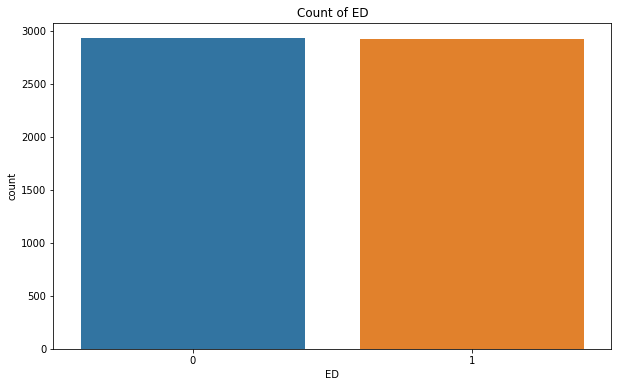

In [117]:
import matplotlib.pyplot as plt
import seaborn as sns
#fig , ax = plt.subplots(figsize=(6,4))
fig , ax = plt.subplots(figsize=(10,6))
sns.countplot(x='ED', data= pd.DataFrame(ED_train_labels['ED'].reset_index()))
plt.title("Count of ED")
plt.show()

In [97]:
#ED_train_labels.head() 
#ED_train_labels['ED']
#pd.DataFrame(cui_data_all_admission_F).reset_index()

In [98]:
# 1. ED_labels classificaiton vlues to 1 (ED),  0 (not ED)
import numpy as np
from sklearn import preprocessing


#ED_y_labels
y_train = np.ravel(ED_train_labels)
print(y_train.shape)


(5849,)


In [99]:
y_test = np.ravel(ED_test_labels)
print(y_test.shape)

(1459,)


In [100]:
###
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.colors import Normalize

from numpy import mean
from numpy import std
from pandas import read_csv

from pprint import pprint


from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler, LabelEncoder

from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.model_selection import StratifiedKFold

from sklearn.ensemble import RandomForestClassifier 

import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.utils import class_weight
from sklearn.metrics import recall_score, confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score, plot_confusion_matrix
from sklearn.metrics import confusion_matrix,classification_report

In [101]:
###including a seed option
import numpy as np
np.random.seed(1234)

### I. Linear kernel SVM

training data, in cross validation. See https://scikit-learn.org/stable/modules/cross_validation.html 
from sklearn.model_selection import cross_val_score
clf = svm.SVC(kernel='linear', C=1, random_state=42)
scores = cross_val_score(clf, X, y, cv=5)
scores

In [147]:
# X_train_scaled , X_test_scaled, NY_X_scaled , y_train,y_test
print(ED_train.shape, y_train.shape)

(5849, 500) (5849,)


In [103]:
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import KFold
from sklearn.svm import SVC
# Perform 5-fold cross validation
model = SVC()
#cv = KFold(n_splits=5, random_state=1, shuffle=True)
scores = cross_val_score(model, X_train_scaled, y_train, cv=5)
#scores = cross_val_score(model, X_train_scaled, y_train, scoring='accuracy', cv=cv,n_jobs=-1)
print ('Cross-validated scores:', scores)
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Cross-validated scores: [0.9008547  0.91111111 0.88888889 0.84786325 0.78785287]
Accuracy: 0.867 (0.045)


#### I.2.Linear SVC Perform a suitable grid-search to find a reasonable set-up of your chosen classifier

In [148]:
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.svm import SVC

# #############################################################################
# Train classifiers
#
# For an initial search, a logarithmic grid with basis
# 10 is often helpful. Using a basis of 2, a finer
# tuning can be achieved but at a much higher cost.


C_range = [1e-2, 1, 1e2]
gamma_range = [1e-1, 1, 1e1]
classifiers = []
for C in C_range:
    for gamma in gamma_range:
        clf = SVC(kernel='linear', C=C, gamma=gamma)
        clf.fit(X_train_scaled, y_train)
        classifiers.append((C, gamma, clf))
param_grid = dict(gamma=gamma_range, C=C_range)
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
grid = GridSearchCV(SVC(), param_grid=param_grid)
grid.fit(X_train_scaled, y_train)
print("The best parameters are %s with a score of %0.2f"
      % (grid.best_params_, grid.best_score_))


The best parameters are {'C': 1, 'gamma': 0.1} with a score of 0.87


In [149]:
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import KFold
from sklearn.svm import SVC

# SVM kernel='linear' best : 'C': 100, 'gamma': 0.1
c=1
gamma=0.1

# Linear kernel SVM
svm_L = SVC(kernel='linear', C=c, gamma=gamma, random_state=42) 
#svm_L.fit(X_train_scaled, y_train)


# Perform 5-fold cross validation
cv = KFold(n_splits=5, random_state=1, shuffle=True)
scores = cross_val_score(svm_L, X_train_scaled, y_train, scoring='accuracy', cv=cv,n_jobs=-1)
print ('Cross-validated scores:', scores)
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))


Cross-validated scores: [0.86666667 0.87948718 0.9025641  0.87008547 0.8742515 ]
Accuracy: 0.879 (0.013)


In [150]:
#perform prediction on X_test_scaled
y_pred = cross_val_predict(svm_L, X_test_scaled, y_test, cv=5)
# X_train_scaled, y_train

Classification of SVM linear: Accuracy 0.842
Unweighted Recall of the model is : 0.8421


<AxesSubplot:>

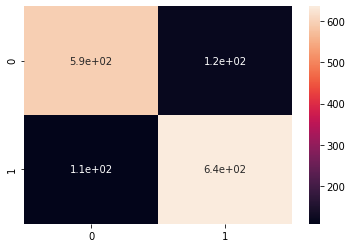

In [151]:
# score the performance using accuracy and plots the resulting confusion matrix
#Test accuracy on the NY data
accuracy_test= accuracy_score(y_test, y_pred)
#accuracy_test= accuracy_score(y_train, y_pred)

print( "Classification of SVM linear: Accuracy " + str(round(accuracy_test,3)))

UAR = recall_score(y_test, y_pred , average="macro")
#UAR = recall_score(y_train, y_pred , average="macro")

print( "Unweighted Recall of the model is : " + str(round(UAR, 4)))

cf_matrix = confusion_matrix(y_test, y_pred)
#cf_matrix = confusion_matrix(y_train, y_pred)
sns.heatmap(cf_matrix, annot=True)

In [152]:
print(cf_matrix)

# Classification report, includes accuracy
print(classification_report(y_test, y_pred))
#print(classification_report(y_train, y_pred))

[[594 121]
 [109 635]]
              precision    recall  f1-score   support

           0       0.84      0.83      0.84       715
           1       0.84      0.85      0.85       744

    accuracy                           0.84      1459
   macro avg       0.84      0.84      0.84      1459
weighted avg       0.84      0.84      0.84      1459



For classifier with high sensitivity but lower specificity, it classifies well for all patients that were actually “ED” while it classifies relatively lower for all patients that were actually “Not ED”. F1 score is a weighted harmonic mean of precision and recall so it is balancing the problem. Therefore, it is necessary to consider F1 score as well in order to select the best classifier.

###### II. RBF kernel SVC

In [153]:
###### RBF kernel SVM
###including a seed option
import numpy as np
np.random.seed(1234)

#### II.2 RBF kernel SVC : Perform a suitable grid-search to find a reasonable set-up of your chosen classifier

In [154]:
# RBF kernel SVM
C_range = [1e-2, 1, 1e2]
gamma_range = [1e-1, 1, 1e1]
classifiers = []
for C in C_range:
    for gamma in gamma_range:
        clf = SVC(kernel='rbf', C=C, gamma=gamma)
        clf.fit(X_train_scaled, y_train)
        classifiers.append((C, gamma, clf))
param_grid = dict(gamma=gamma_range, C=C_range)
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
grid = GridSearchCV(SVC(), param_grid=param_grid)
grid.fit(X_train_scaled, y_train)
print("The best parameters are %s with a score of %0.2f"
      % (grid.best_params_, grid.best_score_))

The best parameters are {'C': 1, 'gamma': 0.1} with a score of 0.87


Cross-validated scores: [0.85555556 0.87008547 0.8957265  0.86837607 0.86826347]
Accuracy: 0.872 (0.013)
Classification of SVM linear: Accuracy 0.845
Unweighted Recall of the model is : 0.8447
[[591 124]
 [102 642]]
              precision    recall  f1-score   support

           0       0.85      0.83      0.84       715
           1       0.84      0.86      0.85       744

    accuracy                           0.85      1459
   macro avg       0.85      0.84      0.84      1459
weighted avg       0.85      0.85      0.85      1459



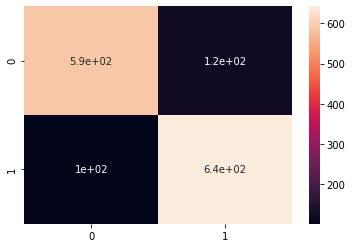

In [157]:
#  SVM kernel='RBF' best : 'C': 1.0, 'gamma': 0.1

c=1
gamma=0.1

svm_rbf = SVC(kernel='rbf', C=c, gamma=gamma, random_state=42)
#svm_rbf.fit(X_train_scaled, y_train)


# Perform 5-fold cross validation
cv = KFold(n_splits=5, random_state=1, shuffle=True)
scores = cross_val_score(svm_rbf, X_train_scaled, y_train, scoring='accuracy', cv=cv,n_jobs=-1)
print ('Cross-validated scores:', scores)
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))


#perform prediction on X_test_scaled
y_pred = cross_val_predict(svm_rbf, X_test_scaled, y_test, cv=5)
# X_train_scaled, y_train


# score the performance using accuracy and plots the resulting confusion matrix
#Test accuracy on the NY data
accuracy_test= accuracy_score(y_test, y_pred)
#accuracy_test= accuracy_score(y_train, y_pred)

print( "Classification of SVM linear: Accuracy " + str(round(accuracy_test,3)))

UAR = recall_score(y_test, y_pred , average="macro")

print( "Unweighted Recall of the model is : " + str(round(UAR, 4)))

cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot=True)

print(cf_matrix)

# Classification report, includes accuracy
print(classification_report(y_test, y_pred))

##

In [156]:
# 2.4 defining parameter range : 'sigmoid'
param_grid = {'C': [0.1, 1, 10, 100],  
              'gamma': [1, 0.1, 0.01], 
              'kernel': ['sigmoid']}  
  
grid = GridSearchCV(SVC(), param_grid, refit = True, cv= 5) 
  
# fitting the model for grid search 
grid.fit(X_train_scaled, y_train) 

  
# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_) 

##prediciton without 5-CV

#grid_predictions = grid.predict(X_test_scaled) 
  

# plot the confusion matrix  
#cm=confusion_matrix(y_test, grid_predictions)

# class_names
#class_names  =["Non ED", "ED"]

#disp = plot_confusion_matrix(grid, X_test_scaled, y_test, display_labels=class_names, cmap=plt.cm.Blues)

#disp.ax_.set_title("Confusion Matrix")

#print(disp.confusion_matrix)

#plt.show()

# classification report, includes accuracy
#print(classification_report(y_test, grid_predictions))


SVC(C=10, gamma=0.01, kernel='sigmoid')


Cross-validated scores: [0.83760684 0.84273504 0.87863248 0.84529915 0.83661249]
Accuracy: 0.848 (0.016)
Classification of SVM linear: Accuracy 0.807
Unweighted Recall of the model is : 0.8057
[[514 201]
 [ 80 664]]
              precision    recall  f1-score   support

           0       0.87      0.72      0.79       715
           1       0.77      0.89      0.83       744

    accuracy                           0.81      1459
   macro avg       0.82      0.81      0.81      1459
weighted avg       0.82      0.81      0.81      1459



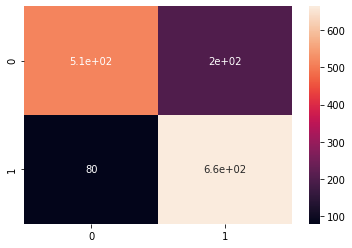

In [158]:
### with 5 CV
#  SVM kernel='sigmoid' best : 'C': 1.0, 'gamma': 0.1
#best_model_sig = grid.best_estimator_

# SVC(C=100, gamma=0.01, kernel='sigmoid')

c=10
gamma=0.01


svm_sim = SVC(kernel='sigmoid', C=c, gamma=gamma, random_state=42)
#svm_rbf.fit(X_train_scaled, y_train)


# Perform 5-fold cross validation
cv = KFold(n_splits=5, random_state=1, shuffle=True)
scores = cross_val_score(svm_sim, X_train_scaled, y_train, scoring='accuracy', cv=cv,n_jobs=-1)
print ('Cross-validated scores:', scores)
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))


#perform prediction on X_test_scaled
y_pred = cross_val_predict(svm_sim, X_test_scaled, y_test, cv=5)
# X_train_scaled, y_train


# score the performance using accuracy and plots the resulting confusion matrix
#Test accuracy on the NY data
accuracy_test= accuracy_score(y_test, y_pred)
#accuracy_test= accuracy_score(y_train, y_pred)

print( "Classification of SVM linear: Accuracy " + str(round(accuracy_test,3)))

UAR = recall_score(y_test, y_pred , average="macro")

print( "Unweighted Recall of the model is : " + str(round(UAR, 4)))

cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot=True)

print(cf_matrix)

# Classification report, includes accuracy
print(classification_report(y_test, y_pred))

##

Sensitivity (Recall or True positive rate)
Sensitivity (SN) is calculated as the number of correct positive predictions divided by the total number of positives. It is also called recall (REC) or true positive rate (TPR). The best sensitivity is 1.0, whereas the worst is 0.0.

Specificity (True negative rate)
Specificity (SP) is calculated as the number of correct negative predictions divided by the total number of negatives. It is also called true negative rate (TNR). The best specificity is 1.0, whereas the worst is 0.0.



In [112]:
from sklearn.ensemble import RandomForestClassifier 
from pprint import pprint

In [113]:
###including a seed option
import numpy as np
np.random.seed(1234)

### II. Supervised Learning Random Forest Classifier

#### Implementing an RF Classifier : Predict ED
- Implement a 'naive' RF classifier using the default parameters
1. Split our data into training and testing samples.
2. Initialise a RF classifier using all default parameters
3. Train the RF using the .fit function and the training data+labels :X_train_scaled, y_train
4. Extract the classifier's predictions on test data (X_test_scaled) using the .predict function
5. Examine the classifier's performance on unseen data (y_test) by comparing with the classifier's predictions (y_pred)

In [114]:
from sklearn.ensemble import RandomForestClassifier 
from pprint import pprint
    
#1.Create a Random Forest Classifer. 

naive_classifier = RandomForestClassifier()
naive_classifier.fit(X_train_scaled, y_train)  
y_pred= naive_classifier.predict(X_test_scaled)  
print(classification_report(y_test, y_pred))

pprint(naive_classifier.get_params())

              precision    recall  f1-score   support

           0       0.83      0.84      0.84       715
           1       0.85      0.84      0.84       744

    accuracy                           0.84      1459
   macro avg       0.84      0.84      0.84      1459
weighted avg       0.84      0.84      0.84      1459

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


In [115]:
#### 2.Create an 'improved' Model by Tuning the Hyperparameters

In [116]:
from sklearn.ensemble import RandomForestClassifier 
from pprint import pprint
# set up possible values of parameters to optimize over
parameter_grid = {
            "min_samples_leaf": [1,50,100],
            'n_estimators': [10,100,300],
             'max_features' : [2,3,5,7]
}

In [117]:
#### 3.Using cross validation to tune a RF classifier for a given hyperparameter grid.

In [118]:
# 3.1.Create a gridsearch object with the random forest classifier and parameter_grid,5-fold cross validation
classifier_grid = GridSearchCV(estimator=RandomForestClassifier(), param_grid=parameter_grid, cv=5)

In [119]:
# 3.2.Fit the cross validated grid search on the data 
classifier_grid.fit(X_train_scaled, y_train)

print(" The best parameters found are: ")
classifier_grid.best_params_

 The best parameters found are: 


{'max_features': 5, 'min_samples_leaf': 1, 'n_estimators': 300}

In [120]:
###including a seed option
import numpy as np
np.random.seed(1234)

Cross-validated scores: [0.83675214 0.84615385 0.86410256 0.84273504 0.8314799 ]
Accuracy: 0.844 (0.011)
              precision    recall  f1-score   support

           0       0.84      0.79      0.81       715
           1       0.81      0.86      0.83       744

    accuracy                           0.82      1459
   macro avg       0.83      0.82      0.82      1459
weighted avg       0.83      0.82      0.82      1459

Classification of RM: Accuracy 0.824
Unweighted Recall of the model is : 0.8231
[[562 153]
 [104 640]]
              precision    recall  f1-score   support

           0       0.84      0.79      0.81       715
           1       0.81      0.86      0.83       744

    accuracy                           0.82      1459
   macro avg       0.83      0.82      0.82      1459
weighted avg       0.83      0.82      0.82      1459



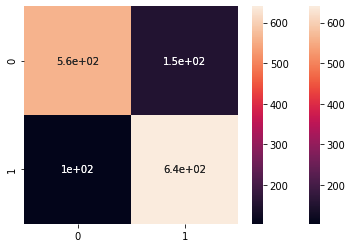

In [121]:
# 3.3.the best parameters and 5-fold cross validation
# {'max_features': 7, 'min_samples_leaf': 1, 'n_estimators': 300}
best_model = classifier_grid.best_estimator_


# Perform 5-fold cross validation
cv = KFold(n_splits=5, random_state=1, shuffle=True)
scores = cross_val_score(best_model, X_train_scaled, y_train, scoring='accuracy', cv=cv,n_jobs=-1)
print ('Cross-validated scores:', scores)
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))


# 3.4 evaluating the best model's performance

#perform prediction on X_test_scaled
y_pred = cross_val_predict(best_model, X_test_scaled, y_test, cv=5)
#y_pred= best_model.predict(X_test_scaled) 
print(classification_report(y_test, y_pred))

#[
#proba = cross_val_predict(clf, X, y, cv=k_fold, method='predict_proba')
#print(proba[:,1])
#print(np.argsort(proba[:,1])) 
    
#]

# score the performance using accuracy and plots the resulting confusion matrix
#Test accuracy on the NY data
accuracy_devel= accuracy_score(y_test, y_pred)

print( "Classification of RM: Accuracy " + str(round(accuracy_devel,3)))

cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot=True)

UAR = recall_score(y_test, y_pred , average="macro")

print( "Unweighted Recall of the model is : " + str(round(UAR, 4)))

cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot=True)

print(cf_matrix)
# classification report, includes accuracy
print(classification_report(y_test, y_pred))

#### Visualising Feature Importance

- Because RFs combine many trees, each of which performs classification on a subset of the features, then some features are evidently better than others in predicting the outcomes.

In [122]:
# ED_train
ED_train.columns[[range(1,ED_train.shape[1])]]

/home/ubuntu/anaconda3/lib/python3.8/site-packages/pandas/core/indexes/base.py:4111: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = getitem(key)


Index(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10',
       ...
       '490', '491', '492', '493', '494', '495', '496', '497', '498', '499'],
      dtype='object', length=499)

In [123]:
#https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html
# feature importance  
from pprint import pprint

feature_importance_vector = best_model.feature_importances_
pprint(feature_importance_vector)

feature_names=ED_train.columns[[range(1,ED_train.shape[1])]]


# feature importances
column_names = ["feature_names", "importances"]
F_I = pd.DataFrame(columns = column_names)

feature_names=[]
importances =[]
for name, importance in zip(ED_train.columns[[range(1,ED_train.shape[1])]], best_model.feature_importances_):
    print(name, "=", importance)
    #i=pd.DataFrame(data = zip(name, importance), columns=['feature_names', 'importances'])
    #print(i)
    feature_names.append(name)
    importances.append(importance)
F_I = pd.DataFrame(
    {'feature_names': feature_names,
     'importances': importances
    })



array([0.00326072, 0.00177736, 0.00124699, 0.00575164, 0.00117055,
       0.00306352, 0.00366228, 0.00216446, 0.00117022, 0.00167632,
       0.00095753, 0.00132774, 0.00096817, 0.00559728, 0.00110557,
       0.00113177, 0.0008809 , 0.00152785, 0.00144369, 0.00201073,
       0.00161836, 0.00119823, 0.0013053 , 0.00169481, 0.00105064,
       0.00186411, 0.00110415, 0.00302591, 0.00171167, 0.0009707 ,
       0.00173221, 0.00094708, 0.0018791 , 0.00223362, 0.0015402 ,
       0.00158276, 0.00145791, 0.00226276, 0.00108664, 0.00121716,
       0.00170174, 0.00089245, 0.00133688, 0.00123067, 0.00132879,
       0.0011567 , 0.00140349, 0.00114567, 0.00108426, 0.00121149,
       0.00106433, 0.00126842, 0.00130171, 0.00125074, 0.0011573 ,
       0.00113178, 0.0011814 , 0.00129434, 0.00182641, 0.0013352 ,
       0.00142378, 0.00153675, 0.00158765, 0.00212885, 0.0018814 ,
       0.00326096, 0.00284366, 0.00146469, 0.00149876, 0.00162266,
       0.00168714, 0.00094635, 0.001416  , 0.00138781, 0.00124

In [124]:
F_I.head()

,feature_names,importances
0,1,0.003261
1,2,0.001777
2,3,0.001247
3,4,0.005752
4,5,0.001171


In [125]:
#print(len(F_I[F_I.importances >0.001]))
#F_I[F_I.importances >0.001]

In [126]:
# After selecting features

In [127]:
f_d=F_I[F_I.importances >0.001]
f_d.shape

(483, 2)

In [128]:
F_I.to_csv(DATA_DIR + "V_34.F.RM_cui2vec_importance_nameF_df.csv", index=True)

In [129]:
##### Apply the best model to NY patients

In [130]:
## 4. Predicton of ED patients for NY group using RBF SVM model
# NY_X_scaled

In [131]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier  
from sklearn.model_selection import GridSearchCV, cross_val_score,  train_test_split
from sklearn.metrics import accuracy_score, plot_confusion_matrix
from sklearn.metrics import confusion_matrix,classification_report
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import KFold
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier 
from pprint import pprint

In [132]:
import numpy as np
np.random.seed(1234)

In [133]:
# RBF SVM

Cross-validated scores: [0.85555556 0.87008547 0.8957265  0.86837607 0.86826347]
Accuracy: 0.872 (0.013)
Classification of SVM linear: Accuracy 0.845
Unweighted Recall of the model is : 0.8447
[[591 124]
 [102 642]]
              precision    recall  f1-score   support

           0       0.85      0.83      0.84       715
           1       0.84      0.86      0.85       744

    accuracy                           0.85      1459
   macro avg       0.85      0.84      0.84      1459
weighted avg       0.85      0.85      0.85      1459



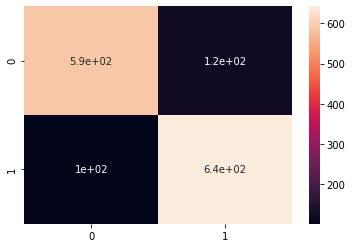

In [159]:
#  SVM kernel='RBF' best : 'C': 1.0, 'gamma': 0.1

c=1
gamma=0.1

svm_rbf = SVC(kernel='rbf', C=c, gamma=gamma, random_state=42)
#svm_rbf.fit(X_train_scaled, y_train)


# Perform 5-fold cross validation
cv = KFold(n_splits=5, random_state=1, shuffle=True)
scores = cross_val_score(svm_rbf, X_train_scaled, y_train, scoring='accuracy', cv=cv,n_jobs=-1)
print ('Cross-validated scores:', scores)
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))


#perform prediction on X_test_scaled
y_pred = cross_val_predict(svm_rbf, X_test_scaled, y_test, cv=5)
# X_train_scaled, y_train


# score the performance using accuracy and plots the resulting confusion matrix
#Test accuracy on the NY data
accuracy_test= accuracy_score(y_test, y_pred)
#accuracy_test= accuracy_score(y_train, y_pred)

print( "Classification of SVM linear: Accuracy " + str(round(accuracy_test,3)))

UAR = recall_score(y_test, y_pred , average="macro")

print( "Unweighted Recall of the model is : " + str(round(UAR, 4)))

cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot=True)

print(cf_matrix)

# Classification report, includes accuracy
print(classification_report(y_test, y_pred))


In [160]:
# probability 
# X_ED_scaled

from sklearn.calibration import CalibratedClassifierCV
#  SVM kernel='RBF' best : 'C': 1.0, 'gamma': 0.1

c=1
gamma=0.1


# Linear kernel SVM
#svm_L2 = SVC(kernel='linear', C=c, gamma=gamma, random_state=42,probability=True) 
svm_rbf = SVC(kernel='rbf', C=c, gamma=gamma, random_state=42)
model = CalibratedClassifierCV(svm_rbf) 

model.fit(X_train_scaled, y_train)
#pred_class = model.predict(y_test)
probability = model.predict_proba(NY_X_scaled)

In [136]:
#pred_class = model.predict(y_test)
#probability = model.predict_proba(NY_X_scaled)

In [161]:
NY_X_scaled

array([[0.93877746, 0.42506343, 0.47375   , ..., 0.3912053 , 0.38218908,
        0.60162587],
       [0.61658345, 0.61815316, 0.54613399, ..., 0.47736688, 0.71400292,
        0.62451685],
       [0.90160099, 0.46643371, 0.448327  , ..., 0.43392622, 0.46894708,
        0.51015185],
       ...,
       [0.69678581, 0.54132485, 0.51727007, ..., 0.50859468, 0.71061262,
        0.53953491],
       [0.72618188, 0.58350792, 0.50231386, ..., 0.56548301, 0.60099655,
        0.53961093],
       [0.82394164, 0.38299957, 0.6132701 , ..., 0.53983665, 0.56340245,
        0.51230419]])

In [162]:
prob_d=pd.DataFrame(probability)
print(prob_d.shape)
prob_d.head()

(7155, 2)


,0,1
0,0.962850,0.037150
1,0.078440,0.921560
2,0.821125,0.178875
3,0.203081,0.796919
4,0.415449,0.584551


In [163]:
len(NY_X_scaled)

7155

In [164]:
# NY sample 1
prob_d=prob_d.rename(columns = {1:'ED probability'})

In [165]:
prob_d.columns

Index([0, 'ED probability'], dtype='object')

In [166]:
d_NY= data_NY.drop(["cuis","vec"],axis=1)
d_NY.shape

(7155, 505)

In [167]:
ED_NY_c2v_rm_Pred=pd.concat([prob_d, d_NY], axis=1)


In [168]:
d_NY.head()

,Unnamed: 0,Unnamed: 0.1,hadm_id,group,subject_id,0,1,2,3,4,...,490,491,492,493,494,495,496,497,498,499
0,0,0,100135,NY,2507,-0.060212,0.028426,-1.112555e-16,-0.028944,0.002221,...,-0.003583,-0.006079,-0.002736,-0.018164,0.019999,0.011667,-0.002572,-0.012716,-0.025878,0.009070
1,1,1,100335,NY,2700,-0.296494,0.117777,-4.053823e-18,0.029847,-0.030426,...,0.009504,-0.003505,-0.006841,0.000137,-0.009731,0.001908,-0.003633,-0.002776,0.011072,0.011546
2,2,2,100498,NY,3589,-0.087475,0.047570,-1.489074e-16,-0.020587,0.002850,...,-0.011232,-0.015973,-0.007612,-0.013975,0.012437,0.006681,-0.003837,-0.007787,-0.016217,-0.000825
3,3,3,100514,NY,5213,-0.135971,0.038312,-4.786486e-17,-0.003499,-0.015755,...,0.004056,0.001946,-0.013421,-0.005857,-0.005391,-0.001484,-0.006853,0.003770,0.012239,0.003451
4,4,4,100617,NY,5324,-0.160799,0.014683,4.798310e-18,-0.006354,0.008665,...,0.002252,-0.005261,-0.017680,0.002561,0.001580,0.000589,-0.001476,0.005137,0.009035,0.001518


In [169]:
ED_NY_c2v_rm_Pred.head()

,0,ED probability,Unnamed: 0,Unnamed: 0.1,hadm_id,group,subject_id,0,1,2,...,490,491,492,493,494,495,496,497,498,499
0,0.962850,0.037150,0,0,100135,NY,2507,-0.060212,0.028426,-1.112555e-16,...,-0.003583,-0.006079,-0.002736,-0.018164,0.019999,0.011667,-0.002572,-0.012716,-0.025878,0.009070
1,0.078440,0.921560,1,1,100335,NY,2700,-0.296494,0.117777,-4.053823e-18,...,0.009504,-0.003505,-0.006841,0.000137,-0.009731,0.001908,-0.003633,-0.002776,0.011072,0.011546
2,0.821125,0.178875,2,2,100498,NY,3589,-0.087475,0.047570,-1.489074e-16,...,-0.011232,-0.015973,-0.007612,-0.013975,0.012437,0.006681,-0.003837,-0.007787,-0.016217,-0.000825
3,0.203081,0.796919,3,3,100514,NY,5213,-0.135971,0.038312,-4.786486e-17,...,0.004056,0.001946,-0.013421,-0.005857,-0.005391,-0.001484,-0.006853,0.003770,0.012239,0.003451
4,0.415449,0.584551,4,4,100617,NY,5324,-0.160799,0.014683,4.798310e-18,...,0.002252,-0.005261,-0.017680,0.002561,0.001580,0.000589,-0.001476,0.005137,0.009035,0.001518


In [170]:
ED_NY_c2v_rm_Pred.to_csv(DATA_DIR + "V_36.RBF_SVM_ED_NY_c2v_rm_Pred_df.csv", index=True)

In [181]:
## Plot : probability density 

In [171]:
ED_NY_c2v_rm_Pred.columns

Index([               0, 'ED probability',     'Unnamed: 0',   'Unnamed: 0.1',
              'hadm_id',          'group',     'subject_id',              '0',
                    '1',              '2',
       ...
                  '490',            '491',            '492',            '493',
                  '494',            '495',            '496',            '497',
                  '498',            '499'],
      dtype='object', length=507)

In [3]:
# import
import numpy as np
import pandas as pd

ED_NY_c2v_rm_Pred= pd.read_csv(DATA_DIR + "V_36.RBF_SVM_ED_NY_c2v_rm_Pred_df.csv")

In [4]:
# NY sampe1
ED_NY_c2v_rm_Pred.shape

(7155, 508)

In [22]:
print(len(ED_NY_c2v_rm_Pred.loc[(ED_NY_c2v_rm_Pred['ED probability']>0.9),]))
print(len(ED_NY_c2v_rm_Pred.loc[(ED_NY_c2v_rm_Pred['ED probability']>0.5),]))

1980
4735


In [5]:
# sid, admin Id, ED idc9 included?, #of category, average # of cuis per category,
Dp=ED_NY_c2v_rm_Pred[['group','subject_id','hadm_id','ED probability']].groupby(['group','subject_id']).agg({"hadm_id":"count", "ED probability":"mean"})  
Dp=pd.DataFrame(Dp).reset_index()
Dp.head()

,group,subject_id,hadm_id,ED probability
0,NY,12,1,0.973583
1,NY,21,2,0.686443
2,NY,37,1,0.167460
3,NY,38,1,0.829107
4,NY,39,1,0.224219


In [11]:
Dp2=Dp.loc[(Dp['hadm_id']>1),]

In [12]:
Dp2.shape

(1013, 4)

In [14]:
clist=Dp2['subject_id'].unique().tolist()

In [16]:
#clist

In [19]:
ED_NY_c2v_rm_Pred2=ED_NY_c2v_rm_Pred.loc[ED_NY_c2v_rm_Pred['subject_id'].isin (clist),:]

#training_data = data.loc[data['subject_id'].isin (training_list),:]

In [20]:
ED_NY_c2v_rm_Pred2.head()

,Unnamed: 0,0,ED probability,Unnamed: 0.1,Unnamed: 0.1.1,hadm_id,group,subject_id,0.1,1,...,490,491,492,493,494,495,496,497,498,499
5,5,0.150806,0.849194,5,5,100660,NY,631,-0.228271,0.074762,...,-0.003683,-0.016564,-0.011060,0.001748,-0.003069,0.000964,-0.003607,-0.001716,0.003525,0.008716
7,7,0.041953,0.958047,7,7,100719,NY,6589,-0.214684,0.090137,...,-0.020896,-0.012016,-0.026149,-0.001427,0.002532,-0.000539,-0.000964,-0.008124,0.008344,0.011401
10,10,0.211616,0.788384,10,10,101005,NY,1972,-0.156733,-0.014845,...,-0.003911,-0.014309,-0.008426,-0.004487,-0.004847,0.006808,-0.001987,0.010078,0.005002,0.002612
16,16,0.067371,0.932629,16,16,101409,NY,5398,-0.187554,0.053713,...,-0.000146,-0.008188,-0.010505,-0.003754,-0.000019,0.002199,-0.008553,0.001385,0.000816,-0.002610
17,17,0.295522,0.704478,17,17,101462,NY,1313,-0.263267,0.056507,...,0.003493,-0.008593,-0.012906,-0.009599,-0.009690,0.001405,-0.005735,0.009354,-0.001879,-0.004807


In [23]:
print(len(ED_NY_c2v_rm_Pred2.loc[(ED_NY_c2v_rm_Pred2['ED probability']>0.9),]))
print(len(ED_NY_c2v_rm_Pred2.loc[(ED_NY_c2v_rm_Pred2['ED probability']>0.5),]))

692
1740


In [ ]:
print(1980-692)
print(4735-1740)

In [21]:
ED_NY_c2v_rm_Pred2.to_csv(DATA_DIR + "V_36.RBF_SVM_ED_NY_c2v_rm_Pred_df_2.csv", index=True)

In [175]:
#max(Dp['1'])
ED_NY_c2v_rm_Pred.columns

Index(['Unnamed: 0', '0', 'ED probability', 'Unnamed: 0.1', 'Unnamed: 0.1.1',
       'hadm_id', 'group', 'subject_id', '0.1', '1',
       ...
       '490', '491', '492', '493', '494', '495', '496', '497', '498', '499'],
      dtype='object', length=508)

In [176]:
#Dp=Dp.rename(columns = {'1':'ED probability'})

In [177]:
# NY sample1 : 5710 patients
Dp.shape

(5710, 4)

In [178]:
print(len(Dp.loc[(Dp['ED probability']>0.9),]))
print(len(Dp.loc[(Dp['ED probability']>0.5),]))

1444
3744


In [179]:
#ED_NY_Pred_90=ED_NY_Pred.loc[(ED_NY_Pred['ED probability']>0.9), ['ED probability','subject_id','hadm_id']]
ED_NY_c2v_rm_Pred_90=ED_NY_c2v_rm_Pred.loc[(ED_NY_c2v_rm_Pred['ED probability']>0.9),]

In [180]:
# Random sampling : 100 admissions out of 2071
import numpy as np
np.random.seed(1234)
ED_NY_c2v_rm_Pred_90_ha_100 = ED_NY_c2v_rm_Pred_90.sample(n=100)

In [181]:
ED_NY_c2v_rm_Pred_90_ha_100.head()

,Unnamed: 0,0,ED probability,Unnamed: 0.1,Unnamed: 0.1.1,hadm_id,group,subject_id,0.1,1,...,490,491,492,493,494,495,496,497,498,499
76,76,0.024809,0.975191,76,76,107822,NY,1652,-0.194327,0.071866,...,0.001426,-0.008840,-0.014621,-0.002055,-0.001616,0.001673,-0.006519,0.003665,0.009872,-0.002515
2813,2813,0.036512,0.963488,2813,813,182123,NY,17346,-0.203302,0.089304,...,-0.005261,-0.009218,-0.007459,0.005847,-0.010342,-0.004715,0.001036,0.003171,0.020260,0.002436
1603,1603,0.084868,0.915132,1603,603,157511,NY,11520,-0.175612,0.036484,...,-0.010784,-0.010777,-0.010370,-0.003655,-0.004924,0.002032,-0.000772,-0.000320,0.002176,0.003677
4025,4025,0.019165,0.980835,4025,25,102051,NY,30549,-0.423686,0.094221,...,-0.001910,-0.011577,0.000953,-0.001566,-0.017837,-0.007925,0.007879,0.008782,-0.002071,-0.012305
3494,3494,0.095891,0.904109,3494,494,149230,NY,28345,-0.229431,0.094669,...,-0.002910,-0.002871,-0.024736,-0.014054,-0.003667,0.002115,-0.007352,-0.001988,0.004401,-0.000948


In [182]:
#ED_NY_Pred_90_ha_100.to_csv('/home/ubuntu/Scarlett/Output_F/V_35.SVC_ED_NY_Pred_90_ha_100.csv', index=True)
ED_NY_c2v_rm_Pred_90_ha_100.to_csv(DATA_DIR + "V_35.SVC_RBF_ED_NY_Pred_90_ha_100_df.csv", index=True)

In [183]:
#Dp.to_csv('/home/ubuntu/Scarlett/Output_F/V_35.SVC_ED_NY_Dp.csv', index=True)
Dp.to_csv(DATA_DIR + "V_35.SVC_RBF_ED_NY_Dp_df.csv", index=True)

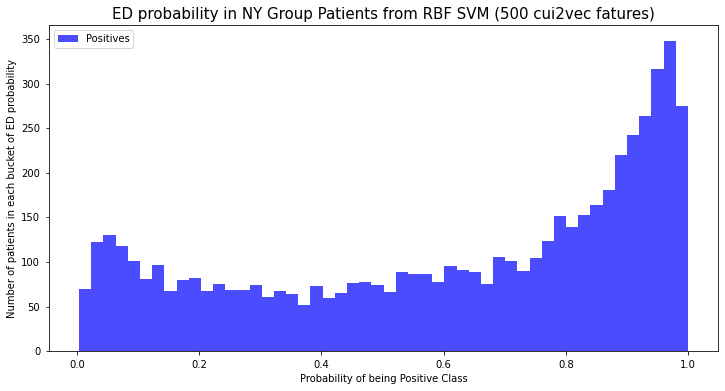

In [184]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
#plt.hist(prediction[y==0], bins=50, label='Negatives')
plt.hist(Dp['ED probability'], bins=50, label='Positives', alpha=0.7, color='b')
plt.xlabel('Probability of being Positive Class', fontsize=10)
plt.ylabel('Number of patients in each bucket of ED probability', fontsize=10)
plt.title('ED probability in NY Group Patients from RBF SVM (500 cui2vec fatures)', fontsize=15)
plt.legend(fontsize=10)
plt.tick_params(axis='both', labelsize=10, pad=5)
plt.show() 